In [1]:
#Do the following:

#1. Pick one use case (defined below).
#2. Explore and research which algorithm would work best for this use case (regression or classification)
#3. Document your findings in a file (3-5 lines) on why you chose this algorithm.
#4. Train the algorithm using Python
#5. Keep the solution as simple as possible. We are not looking for the best machine learning algorithm. 
#   We are interested in seeing that you know how to work with machine learning.
#6. Publish the code on GitHub and send us the link

In [2]:
# Predict passenger data for Ruter Use the same data set given to you in assignment 1. 
# I want you to make a prediction algorithm which predicts the number of passengers on
# a specific date for a specific bus (pick any one). Input should be date and output will
# be number of passengers.
# You should also show the prediction percentage score. Data file: Ruter_data.csv

In [3]:
# Why did you choose this algorithm?

# We decided that we would use Regression in this use case, more spesific the linear regressin algorithm.
# We choose this algorithm because it is used to predict a continuous value. Just like in the example we can predict age prediction, number of passanger/costumers, Prediction of price of an oil.
# Generally used for prediction, forecasting, time series modeling, and determining the causal effect between variables.
# In this case we are curoius about the number of passangers, so we try to find the best fit line so we can predict the output more accurately.
# I choose linear regression because it describes a relationship between two quantities that show a constant rate of change.

In [4]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/Ruter-data.csv"
df = pd.read_csv(url, sep=";")

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


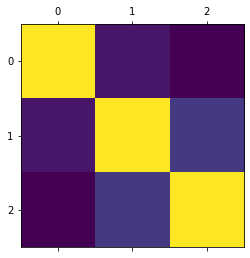

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
Linjeretning,1.000000,0.020337,-0.042414
Kjøretøy_Kapasitet,0.020337,1.000000,0.129959
Passasjerer_Ombord,-0.042414,0.129959,1.000000


In [27]:
#corrMatrix is the variable where you saved the correlation matrix
corrMatrix = df.corr()
#Standard corr plot
plt.matshow(corrMatrix)
plt.show()

#Another style of corr plot
corrMatrix.style.background_gradient(cmap='coolwarm')

In [28]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])

#df = df.loc[df['Linjenavn'] == '150']

#df.insert(2, 'Måned', pd.to_datetime(df['Dato']).d)    # MÅNED
#df.insert(3, 'År', pd.to_datetime(df['Dato']).dt.year)   # ÅR

#df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')   # DAG
#df['DatoOrdinal'] = df['Dato'].map(dt.datetime.toordinal)
#df['DatoFromOrdinal'] = df['DatoOrdinal'].map(dt.datetime.fromordinal)

df['Dato'] = pd.to_datetime(df['Dato'], dayfirst=True)
df


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-06-10,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,2020-06-11,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


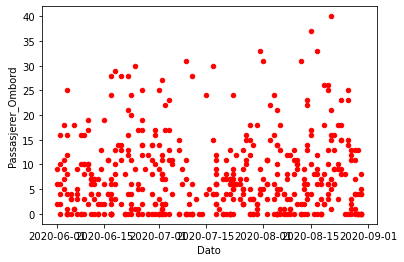

In [29]:
df = df.loc[df['Linjenavn'] == '100']
ax1 = df.plot(kind='scatter', x='Dato', y='Passasjerer_Ombord', color='r')

#ax2 = df.plot(kind='scatter', x='Måned', y='Passasjerer_Ombord', color='g')

,Linjenavn,Passasjerer_Ombord,Dato
38,100,1,2020-08-09
42,100,0,2020-08-18
43,100,7,2020-07-20
46,100,13,2020-07-04
51,100,0,2020-07-22
...,...,...,...
5990,100,6,2020-08-22
5993,100,5,2020-08-30
5995,100,2,2020-06-10
5996,100,2,2020-06-23


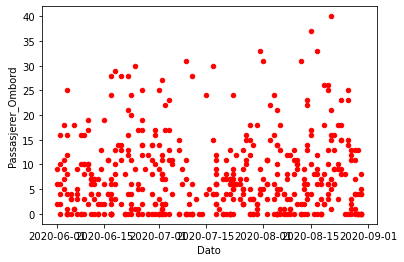

In [30]:
df2 = df[['Linjenavn','Passasjerer_Ombord', 'Dato']].copy()
df2 = df2.loc[df['Linjenavn'] == '100']
ax1 = df2.plot(kind='scatter', x='Dato', y='Passasjerer_Ombord', color='r')
df2

,Passasjerer_Ombord
Dato,
2020-06-01,17
2020-06-02,38
2020-06-03,50
2020-06-04,66
2020-06-05,10
...,...
2020-08-26,77
2020-08-27,42
2020-08-28,40


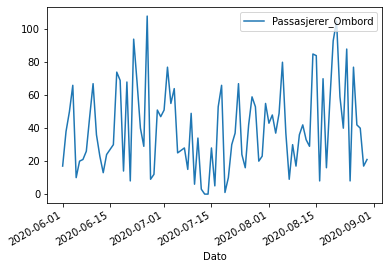

In [58]:

df2 = df2.groupby(['Dato']).sum('Passasjerer_Ombord')
df2.groupby(['Dato']).sum('Passasjerer_Ombord').plot()
df2


In [59]:
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y') 
df['DatoOrdinal'] = df['Dato'].map(dt.datetime.toordinal)

/var/folders/rk/c8yp4nxd1qb7mykwdynz76m00000gn/T/ipykernel_2905/3396745850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')
/var/folders/rk/c8yp4nxd1qb7mykwdynz76m00000gn/T/ipykernel_2905/3396745850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DatoOrdinal'] = df['Dato'].map(dt.datetime.toordinal)


In [39]:

X = pd.DataFrame(df['DatoOrdinal']) #Var1
y = pd.DataFrame(df['Passasjerer_Ombord']) #Result

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

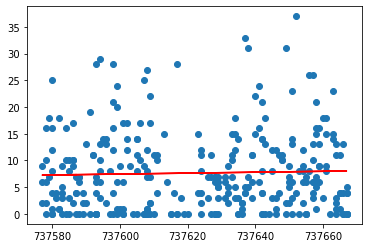

MSE = 54.153548401219744


In [41]:

plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

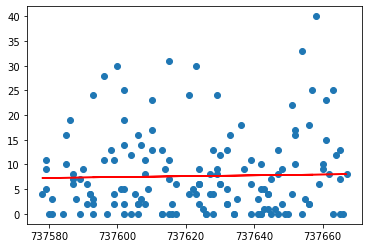

MSE = 66.60242873834189


In [42]:

Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [43]:
linear_regressor.predict([[95*63]]) #Expected output = 62.46

array([[-6281.83827367]])

In [77]:
#Make a new column for Var1 * Var3
#df["Combined"] = df["DatoOrdinal"]*df["Passasjerer_Ombord"]
#Set X to the combined set
X = pd.DataFrame(df["DatoOrdinal"])
#Y to result
y = pd.DataFrame(df["Passasjerer_Ombord"])
#And make sets for Var1 and Var2
X1 = pd.DataFrame(df["DatoOrdinal"])
X2 = pd.DataFrame(df["Passasjerer_Ombord"])

#And lets do the same for the test set
Xt = pd.DataFrame(df['DatoOrdinal'])
Yt = pd.DataFrame(df['Passasjerer_Ombord'])

#Put the data in list, so we can test the different sets in a for loop
dataSet = [X,X1,X2]
trainingSet = [Xt]

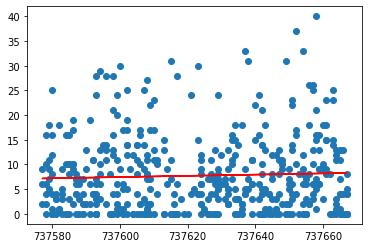

In [78]:
linear_regressor.fit(X, y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

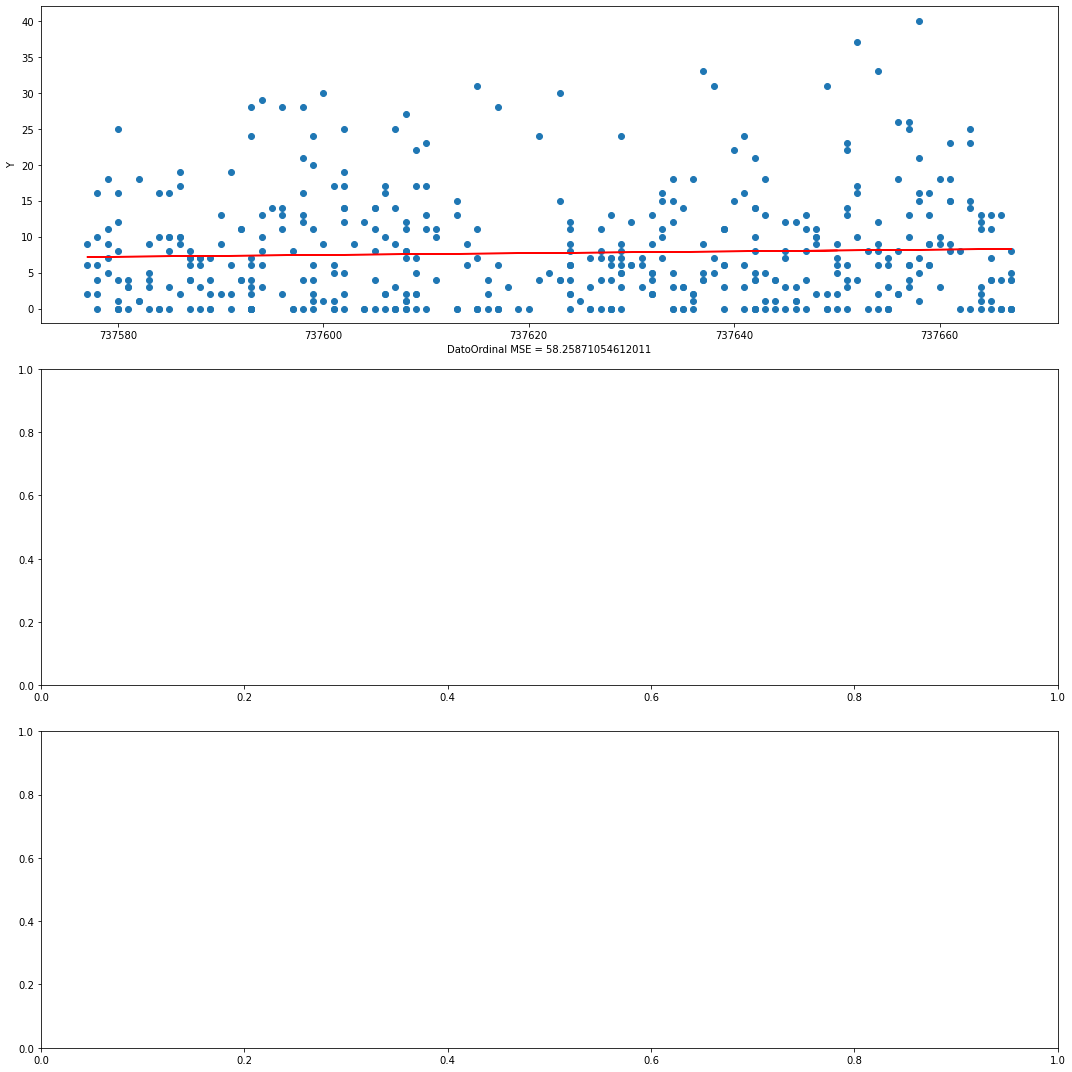

In [79]:
fig, ax = plt.subplots(3, figsize=(15, 15)) #Figsize ( lenght, height )
models = [] #List to save the different model for later use
caps = [ "DatoOrdinal", "Passasjerer_Ombord"] #Caption for the plots
MSE = [] #list to save mean square error
for i in range(1):  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(trainingSet[i], Yt)  # perform linear regression
    Y_pred = linear_regressor.predict(dataSet[i])  # make predictions
    ax[i].scatter(dataSet[i], y) #Plot blue dots from test set
    ax[i].plot(dataSet[i], Y_pred, color='red') #Plot predicted from train
    err=metrics.mean_squared_error(y,Y_pred)
    ax[i].set_xlabel(caps[i] + " MSE = " +str(err )) #Set caption
    ax[i].set_ylabel("Y") #Set y lable
    MSE.append(err) #Calculate and save mse for model
    models.append(linear_regressor) #Save
fig.tight_layout()
plt.show()

In [87]:
#Var1 * Var3
v1=models[0].predict([[79*36]])
#Var 1
v2=models[0].predict([[79]])
#Var3
v3=models[0].predict([[36]])

In [88]:
print(f"Prediction with:\nVar1*Var3 = {v1[0][0]}\nVar1 = {v2[0][0]}\nVar3 = {v3[0][0]}")
print("Correct value = 31.61")

Prediction with:
Var1*Var3 = -9089.86213657802
Var1 = -9124.09675932594
Var3 = -9124.629160330698
Correct value = 31.61
